In [362]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import numpy as np

Archivos entropy (siempre split)

In [363]:
from pathlib import Path
path = Path('../data_inputs')

In [ ]:
ficheros = ['entropy-nofilter', 'entropy-shuffle', 'entropy-bitshuffle', 
                'blosclz-nofilter-split', 'blosclz-shuffle-split', 'blosclz-bitshuffle-split', 
                'lz4-nofilter-split', 'lz4-shuffle-split', 'lz4-bitshuffle-split', 
                'lz4hc-nofilter-split', 'lz4hc-bitshuffle-spli', 'lz4hc-shuffle-split', 
                'zlib-nofilter-split', 'zlib-shuffle-split', 'zlib-bitshuffle-split', 
                'zstd-nofilter-split', 'zstd-shuffle-split', 'zstd-bitshuffle-split']

dataframes = ['df_entropy_nofilters']

for i in range(0, 1):
    dataframes[i] = pd.read_csv(path/'entropy-nofilter.csv.gz', delimiter=',')

#dataframes[i]
df_entropy_nofilters

In [364]:
df_entropy_nofilter = pd.read_csv(path/'entropy-nofilter.csv.gz', delimiter=',')
codec_filter = np.repeat('entropy-nofilter', 55296)
df_entropy_nofilter['codec_filter'] = codec_filter


df_entropy_nofilter.rename(columns = {'cratio':'cratio', ' speed':'speed', ' special_vals':'special_vals', ' nchunk':'nchunk', ' category':'category'}, inplace = True)
value_nchunk = [0,0]
filtered_df_entropy_nofitler = df_entropy_nofilter[df_entropy_nofilter.nchunk.isin(value_nchunk)]

In [365]:
df_entropy_shuffle = pd.read_csv(path/'entropy-shuffle.csv.gz', delimiter=',')
codec_filter = np.repeat('entropy-shuffle', 55296)
df_entropy_shuffle['codec_filter'] = codec_filter


df_entropy_shuffle.rename(columns = {'cratio':'cratio', ' speed':'speed', ' special_vals':'special_vals', ' nchunk':'nchunk', ' category':'category'}, inplace = True)
value_nchunk = [0,0]
filtered_df_entropy_shuffle = df_entropy_shuffle[df_entropy_shuffle.nchunk.isin(value_nchunk)]

In [366]:
df_entropy_bitshuffle = pd.read_csv(path/'entropy-bitshuffle.csv.gz', delimiter=',')
codec_filter = np.repeat('entropy-bitshuffle', 55296)
df_entropy_bitshuffle['codec_filter'] = codec_filter

df_entropy_bitshuffle.rename(columns = {'cratio':'cratio', ' speed':'speed', ' special_vals':'special_vals', ' nchunk':'nchunk', ' category':'category'}, inplace = True)
value_nchunk = [0,0]
filtered_df_entropy_bitshuffle = df_entropy_bitshuffle[df_entropy_bitshuffle.nchunk.isin(value_nchunk)]

Archivos códecs-split

In [367]:
df_blosclz_nofilter_split = pd.read_csv(path/'blosclz-nofilter-split.csv.gz', delimiter=',')
codec_filter = np.repeat('blosclz-nofilter-split', 55296)
df_blosclz_nofilter_split['codec_filter'] = codec_filter

df_blosclz_nofilter_split.rename(columns = {'cratio':'cratio', ' speed':'speed', ' special_vals':'special_vals', ' nchunk':'nchunk', ' category':'category'}, inplace = True)
value_nchunk = [0,0]
filtered_df_blosclz_nofilter_split = df_blosclz_nofilter_split[df_blosclz_nofilter_split.nchunk.isin(value_nchunk)]

In [368]:
df_blosclz_shuffle_split = pd.read_csv(path/'blosclz-shuffle-split.csv.gz', delimiter=',')
codec_filter = np.repeat('blosclz-shuffle-split', 55296)
df_blosclz_shuffle_split['codec_filter'] = codec_filter

df_blosclz_shuffle_split.rename(columns = {'cratio':'cratio', ' speed':'speed', ' special_vals':'special_vals', ' nchunk':'nchunk', ' category':'category'}, inplace = True)
value_nchunk = [0,0]
filtered_df_blosclz_shuffle_split = df_blosclz_shuffle_split[df_blosclz_shuffle_split.nchunk.isin(value_nchunk)]

In [369]:
df_blosclz_bitshuffle_split = pd.read_csv(path/'blosclz-bitshuffle-split.csv.gz', delimiter=',')
codec_filter = np.repeat('blosclz-bitshuffle-split', 55296)
df_blosclz_bitshuffle_split['codec_filter'] = codec_filter

df_blosclz_bitshuffle_split.rename(columns = {'cratio':'cratio', ' speed':'speed', ' special_vals':'special_vals', ' nchunk':'nchunk', ' category':'category'}, inplace = True)
value_nchunk = [0,0]
filtered_df_blosclz_bitshuffle_split = df_blosclz_bitshuffle_split[df_blosclz_bitshuffle_split.nchunk.isin(value_nchunk)]

In [370]:
df_lz4_nofilter_split = pd.read_csv(path/'lz4-nofilter-split.csv.gz', delimiter=',')
codec_filter = np.repeat('lz4-nofilter-split', 55296)
df_lz4_nofilter_split['codec_filter'] = codec_filter

df_lz4_nofilter_split.rename(columns = {'cratio':'cratio', ' speed':'speed', ' special_vals':'special_vals', ' nchunk':'nchunk', ' category':'category'}, inplace = True)
value_nchunk = [0,0]
filtered_df_lz4_nofilter_split = df_lz4_nofilter_split[df_lz4_nofilter_split.nchunk.isin(value_nchunk)]

In [371]:
df_lz4_shuffle_split = pd.read_csv(path/'lz4-shuffle-split.csv.gz', delimiter=',')
codec_filter = np.repeat('lz4-shuffle-split', 55296)
df_lz4_shuffle_split['codec_filter'] = codec_filter

df_lz4_shuffle_split.rename(columns = {'cratio':'cratio', ' speed':'speed', ' special_vals':'special_vals', ' nchunk':'nchunk', ' category':'category'}, inplace = True)
value_nchunk = [0,0]
filtered_df_lz4_shuffle_split = df_lz4_shuffle_split[df_lz4_shuffle_split.nchunk.isin(value_nchunk)]

In [372]:
df_lz4_bitshuffle_split = pd.read_csv(path/'lz4-bitshuffle-split.csv.gz', delimiter=',')
codec_filter = np.repeat('lz4-bitshuffle-split', 55296)
df_lz4_bitshuffle_split['codec_filter'] = codec_filter

df_lz4_bitshuffle_split.rename(columns = {'cratio':'cratio', ' speed':'speed', ' special_vals':'special_vals', ' nchunk':'nchunk', ' category':'category'}, inplace = True)
value_nchunk = [0,0]
filtered_df_lz4_bitshuffle_split = df_lz4_bitshuffle_split[df_lz4_bitshuffle_split.nchunk.isin(value_nchunk)]

In [373]:
df_lz4hc_nofilter_split = pd.read_csv(path/'lz4hc-nofilter-split.csv.gz', delimiter=',')
codec_filter = np.repeat('lz4hc-nofilter-split', 55296)
df_lz4hc_nofilter_split['codec_filter'] = codec_filter

df_lz4hc_nofilter_split.rename(columns = {'cratio':'cratio', ' speed':'speed', ' special_vals':'special_vals', ' nchunk':'nchunk', ' category':'category'}, inplace = True)
value_nchunk = [0,0]
filtered_df_lz4hc_nofilter_split = df_lz4hc_nofilter_split[df_lz4hc_nofilter_split.nchunk.isin(value_nchunk)]

In [374]:
df_lz4hc_bitshuffle_split = pd.read_csv(path/'lz4hc-bitshuffle-split.csv.gz', delimiter=',')
codec_filter = np.repeat('lz4hc-bitshuffle-split', 55296)
df_lz4hc_bitshuffle_split['codec_filter'] = codec_filter

df_lz4hc_bitshuffle_split.rename(columns = {'cratio':'cratio', ' speed':'speed', ' special_vals':'special_vals', ' nchunk':'nchunk', ' category':'category'}, inplace = True)
value_nchunk = [0,0]
filtered_df_lz4hc_bitshuffle_split = df_lz4hc_bitshuffle_split[df_lz4hc_bitshuffle_split.nchunk.isin(value_nchunk)]

In [375]:
df_lz4hc_shuffle_split = pd.read_csv(path/'lz4hc-shuffle-split.csv.gz', delimiter=',')
codec_filter = np.repeat('lz4hc-shuffle-split', 55296)
df_lz4hc_shuffle_split['codec_filter'] = codec_filter

df_lz4hc_shuffle_split.rename(columns = {'cratio':'cratio', ' speed':'speed', ' special_vals':'special_vals', ' nchunk':'nchunk', ' category':'category'}, inplace = True)
value_nchunk = [0,0]
filtered_df_lz4hc_shuffle_split = df_lz4hc_shuffle_split[df_lz4hc_shuffle_split.nchunk.isin(value_nchunk)]

In [376]:
df_zlib_nofilter_split = pd.read_csv(path/'zlib-nofilter-split.csv.gz', delimiter=',')
codec_filter = np.repeat('zlib-nofilter-split', 55296)
df_zlib_nofilter_split['codec_filter'] = codec_filter

df_zlib_nofilter_split.rename(columns = {'cratio':'cratio', ' speed':'speed', ' special_vals':'special_vals', ' nchunk':'nchunk', ' category':'category'}, inplace = True)
value_nchunk = [0,0]
filtered_df_zlib_nofilter_split = df_zlib_nofilter_split[df_zlib_nofilter_split.nchunk.isin(value_nchunk)]

In [377]:
df_zlib_shuffle_split = pd.read_csv(path/'zlib-shuffle-split.csv.gz', delimiter=',')
codec_filter = np.repeat('zlib-shuffle-split', 55296)
df_zlib_shuffle_split['codec_filter'] = codec_filter

df_zlib_shuffle_split.rename(columns = {'cratio':'cratio', ' speed':'speed', ' special_vals':'special_vals', ' nchunk':'nchunk', ' category':'category'}, inplace = True)
value_nchunk = [0,0]
filtered_df_zlib_shuffle_split = df_zlib_shuffle_split[df_zlib_shuffle_split.nchunk.isin(value_nchunk)]

In [378]:
df_zlib_bitshuffle_split = pd.read_csv(path/'zlib-bitshuffle-split.csv.gz', delimiter=',')
codec_filter = np.repeat('zlib-bitshuffle-split', 55296)
df_zlib_bitshuffle_split['codec_filter'] = codec_filter

df_zlib_bitshuffle_split.rename(columns = {'cratio':'cratio', ' speed':'speed', ' special_vals':'special_vals', ' nchunk':'nchunk', ' category':'category'}, inplace = True)
value_nchunk = [0,0]
filtered_df_zlib_bitshuffle_split = df_zlib_bitshuffle_split[df_zlib_bitshuffle_split.nchunk.isin(value_nchunk)]

In [379]:
df_zstd_nofilter_split = pd.read_csv(path/'zstd-nofilter-split.csv.gz', delimiter=',')
codec_filter = np.repeat('zstd-nofilter-split', 55296)
df_zstd_nofilter_split['codec_filter'] = codec_filter

df_zstd_nofilter_split.rename(columns = {'cratio':'cratio', ' speed':'speed', ' special_vals':'special_vals', ' nchunk':'nchunk', ' category':'category'}, inplace = True)
value_nchunk = [0,0]
filtered_df_zstd_nofilter_split = df_zstd_nofilter_split[df_zstd_nofilter_split.nchunk.isin(value_nchunk)]

In [380]:
df_zstd_shuffle_split = pd.read_csv(path/'zstd-shuffle-split.csv.gz', delimiter=',')
codec_filter = np.repeat('zstd-shuffle-split', 55296)
df_zstd_shuffle_split['codec_filter'] = codec_filter

df_zstd_shuffle_split.rename(columns = {'cratio':'cratio', ' speed':'speed', ' special_vals':'special_vals', ' nchunk':'nchunk', ' category':'category'}, inplace = True)
value_nchunk = [0,0]
filtered_df_zstd_shuffle_split = df_zstd_shuffle_split[df_zstd_shuffle_split.nchunk.isin(value_nchunk)]

In [381]:
df_zstd_bitshuffle_split = pd.read_csv(path/'zstd-bitshuffle-split.csv.gz', delimiter=',')
codec_filter = np.repeat('zstd-bitshuffle-split', 55296)
df_zstd_bitshuffle_split['codec_filter'] = codec_filter

df_zstd_bitshuffle_split.rename(columns = {'cratio':'cratio', ' speed':'speed', ' special_vals':'special_vals', ' nchunk':'nchunk', ' category':'category'}, inplace = True)
value_nchunk = [0,0]
filtered_df_zstd_bitshuffle_split = df_zstd_bitshuffle_split[df_zstd_bitshuffle_split.nchunk.isin(value_nchunk)]

Archivos códecs-nosplit

In [382]:
df_blosclz_nofilter_nosplit = pd.read_csv(path/'blosclz-nofilter-nosplit.csv.gz', delimiter=',')
codec_filter = np.repeat('blosclz-nofilter-nosplit', 13824)
df_blosclz_nofilter_nosplit['codec_filter'] = codec_filter

df_blosclz_nofilter_nosplit.rename(columns = {'cratio':'cratio', ' speed':'speed', ' special_vals':'special_vals', ' nchunk':'nchunk', ' category':'category'}, inplace = True)
value_nchunk = [0,0]
filtered_df_blosclz_nofilter_nosplit = df_blosclz_nofilter_nosplit[df_blosclz_nofilter_nosplit.nchunk.isin(value_nchunk)]

In [383]:
df_blosclz_shuffle_nosplit = pd.read_csv(path/'blosclz-shuffle-nosplit.csv.gz', delimiter=',')
codec_filter = np.repeat('blosclz-shuffle-nosplit', 13824)
df_blosclz_shuffle_nosplit['codec_filter'] = codec_filter

df_blosclz_shuffle_nosplit.rename(columns = {'cratio':'cratio', ' speed':'speed', ' special_vals':'special_vals', ' nchunk':'nchunk', ' category':'category'}, inplace = True)
value_nchunk = [0,0]
filtered_df_blosclz_shuffle_nosplit = df_blosclz_shuffle_nosplit[df_blosclz_shuffle_nosplit.nchunk.isin(value_nchunk)]

In [384]:
df_blosclz_bitshuffle_nosplit = pd.read_csv(path/'blosclz-bitshuffle-nosplit.csv.gz', delimiter=',')
codec_filter = np.repeat('blosclz-bitshuffle-nosplit', 13824)
df_blosclz_bitshuffle_nosplit['codec_filter'] = codec_filter

df_blosclz_bitshuffle_nosplit.rename(columns = {'cratio':'cratio', ' speed':'speed', ' special_vals':'special_vals', ' nchunk':'nchunk', ' category':'category'}, inplace = True)
value_nchunk = [0,0]
filtered_df_blosclz_bitshuffle_nosplit = df_blosclz_bitshuffle_nosplit[df_blosclz_bitshuffle_nosplit.nchunk.isin(value_nchunk)]

In [385]:
df_lz4_nofilter_nosplit = pd.read_csv(path/'lz4-nofilter-nosplit.csv.gz', delimiter=',')
codec_filter = np.repeat('lz4-nofilter-nosplit', 13824)
df_lz4_nofilter_nosplit['codec_filter'] = codec_filter

df_lz4_nofilter_nosplit.rename(columns = {'cratio':'cratio', ' speed':'speed', ' special_vals':'special_vals', ' nchunk':'nchunk', ' category':'category'}, inplace = True)
value_nchunk = [0,0]
filtered_df_lz4_nofilter_nosplit = df_lz4_nofilter_nosplit[df_lz4_nofilter_nosplit.nchunk.isin(value_nchunk)]

In [386]:
df_lz4_shuffle_nosplit = pd.read_csv(path/'lz4-shuffle-nosplit.csv.gz', delimiter=',')
codec_filter = np.repeat('lz4-shuffle-nosplit', 13824)
df_lz4_shuffle_nosplit['codec_filter'] = codec_filter

df_lz4_shuffle_nosplit.rename(columns = {'cratio':'cratio', ' speed':'speed', ' special_vals':'special_vals', ' nchunk':'nchunk', ' category':'category'}, inplace = True)
value_nchunk = [0,0]
filtered_df_lz4_shuffle_nosplit = df_lz4_shuffle_nosplit[df_lz4_shuffle_nosplit.nchunk.isin(value_nchunk)]

In [387]:
df_lz4_bitshuffle_nosplit = pd.read_csv(path/'lz4-bitshuffle-nosplit.csv.gz', delimiter=',')
codec_filter = np.repeat('lz4-bitshuffle-nosplit', 13824)
df_lz4_bitshuffle_nosplit['codec_filter'] = codec_filter

df_lz4_bitshuffle_nosplit.rename(columns = {'cratio':'cratio', ' speed':'speed', ' special_vals':'special_vals', ' nchunk':'nchunk', ' category':'category'}, inplace = True)
value_nchunk = [0,0]
filtered_df_lz4_bitshuffle_nosplit = df_lz4_bitshuffle_nosplit[df_lz4_bitshuffle_nosplit.nchunk.isin(value_nchunk)]

In [388]:
df_lz4hc_nofilter_nosplit = pd.read_csv(path/'lz4hc-nofilter-nosplit.csv.gz', delimiter=',')
codec_filter = np.repeat('lz4hc-nofilter-nosplit', 13824)
df_lz4hc_nofilter_nosplit['codec_filter'] = codec_filter

df_lz4hc_nofilter_nosplit.rename(columns = {'cratio':'cratio', ' speed':'speed', ' special_vals':'special_vals', ' nchunk':'nchunk', ' category':'category'}, inplace = True)
value_nchunk = [0,0]
filtered_df_lz4hc_nofilter_nosplit = df_lz4hc_nofilter_nosplit[df_lz4hc_nofilter_nosplit.nchunk.isin(value_nchunk)]

In [389]:
df_lz4hc_shuffle_nosplit = pd.read_csv(path/'lz4hc-shuffle-nosplit.csv.gz', delimiter=',')
codec_filter = np.repeat('lz4hc-shuffle-nosplit', 13824)
df_lz4hc_shuffle_nosplit['codec_filter'] = codec_filter

df_lz4hc_shuffle_nosplit.rename(columns = {'cratio':'cratio', ' speed':'speed', ' special_vals':'special_vals', ' nchunk':'nchunk', ' category':'category'}, inplace = True)
value_nchunk = [0,0]
filtered_df_lz4hc_shuffle_nosplit = df_lz4hc_shuffle_nosplit[df_lz4hc_shuffle_nosplit.nchunk.isin(value_nchunk)]

In [390]:
df_lz4hc_bitshuffle_nosplit = pd.read_csv(path/'lz4hc-bitshuffle-nosplit.csv.gz', delimiter=',')
codec_filter = np.repeat('lz4hc-bitshuffle-nosplit', 13824)
df_lz4hc_bitshuffle_nosplit['codec_filter'] = codec_filter

df_lz4hc_bitshuffle_nosplit.rename(columns = {'cratio':'cratio', ' speed':'speed', ' special_vals':'special_vals', ' nchunk':'nchunk', ' category':'category'}, inplace = True)
value_nchunk = [0,0]
filtered_df_lz4hc_bitshuffle_nosplit = df_lz4hc_bitshuffle_nosplit[df_lz4hc_bitshuffle_nosplit.nchunk.isin(value_nchunk)]

In [391]:
df_zlib_nofilter_nosplit = pd.read_csv(path/'zlib-nofilter-nosplit.csv.gz', delimiter=',')
codec_filter = np.repeat('zlib-nofilter-nosplit', 13824)
df_zlib_nofilter_nosplit['codec_filter'] = codec_filter

df_zlib_nofilter_nosplit.rename(columns = {'cratio':'cratio', ' speed':'speed', ' special_vals':'special_vals', ' nchunk':'nchunk', ' category':'category'}, inplace = True)
value_nchunk = [0,0]
filtered_df_zlib_nofilter_nosplit = df_zlib_nofilter_nosplit[df_zlib_nofilter_nosplit.nchunk.isin(value_nchunk)]

In [392]:
df_zlib_shuffle_nosplit = pd.read_csv(path/'zlib-shuffle-nosplit.csv.gz', delimiter=',')
codec_filter = np.repeat('zlib-shuffle-nosplit', 13824)
df_zlib_shuffle_nosplit['codec_filter'] = codec_filter

df_zlib_shuffle_nosplit.rename(columns = {'cratio':'cratio', ' speed':'speed', ' special_vals':'special_vals', ' nchunk':'nchunk', ' category':'category'}, inplace = True)
value_nchunk = [0,0]
filtered_df_zlib_shuffle_nosplit = df_zlib_shuffle_nosplit[df_zlib_shuffle_nosplit.nchunk.isin(value_nchunk)]

In [393]:
df_zlib_bitshuffle_nosplit = pd.read_csv(path/'zlib-bitshuffle-nosplit.csv.gz', delimiter=',')
codec_filter = np.repeat('zlib-bitshuffle-nosplit', 13824)
df_zlib_bitshuffle_nosplit['codec_filter'] = codec_filter

df_zlib_bitshuffle_nosplit.rename(columns = {'cratio':'cratio', ' speed':'speed', ' special_vals':'special_vals', ' nchunk':'nchunk', ' category':'category'}, inplace = True)
value_nchunk = [0,0]
filtered_df_zlib_bitshuffle_nosplit = df_zlib_bitshuffle_nosplit[df_zlib_bitshuffle_nosplit.nchunk.isin(value_nchunk)]

In [394]:
df_zstd_nofilter_nosplit = pd.read_csv(path/'zstd-nofilter-nosplit.csv.gz', delimiter=',')
codec_filter = np.repeat('zstd-nofilter-nosplit', 13824)
df_zstd_nofilter_nosplit['codec_filter'] = codec_filter

df_zstd_nofilter_nosplit.rename(columns = {'cratio':'cratio', ' speed':'speed', ' special_vals':'special_vals', ' nchunk':'nchunk', ' category':'category'}, inplace = True)
value_nchunk = [0,0]
filtered_df_zstd_nofilter_nosplit = df_zstd_nofilter_nosplit[df_zstd_nofilter_nosplit.nchunk.isin(value_nchunk)]

In [395]:
df_zstd_shuffle_nosplit = pd.read_csv(path/'zstd-shuffle-nosplit.csv.gz', delimiter=',')
codec_filter = np.repeat('zstd-shuffle-nosplit', 13824)
df_zstd_shuffle_nosplit['codec_filter'] = codec_filter

df_zstd_shuffle_nosplit.rename(columns = {'cratio':'cratio', ' speed':'speed', ' special_vals':'special_vals', ' nchunk':'nchunk', ' category':'category'}, inplace = True)
value_nchunk = [0,0]
filtered_df_zstd_shuffle_nosplit = df_zstd_shuffle_nosplit[df_zstd_shuffle_nosplit.nchunk.isin(value_nchunk)]

In [396]:
df_zstd_bitshuffle_nosplit = pd.read_csv(path/'zstd-bitshuffle-nosplit.csv.gz', delimiter=',')
codec_filter = np.repeat('zstd-bitshuffle-nosplit', 13824)
df_zstd_bitshuffle_nosplit['codec_filter'] = codec_filter

df_zstd_bitshuffle_nosplit.rename(columns = {'cratio':'cratio', ' speed':'speed', ' special_vals':'special_vals', ' nchunk':'nchunk', ' category':'category'}, inplace = True)
value_nchunk = [0,0]
filtered_df_zstd_bitshuffle_nosplit = df_zstd_bitshuffle_nosplit[df_zstd_bitshuffle_nosplit.nchunk.isin(value_nchunk)]

In [397]:
filtered_df_blosclz_nofilter_split.shape

(256, 6)

In [398]:
filtered_df_blosclz_nofilter_nosplit.shape

(64, 6)

In [399]:
256/64

4.0

In [400]:
filtered_df_blosclz_nofilter_nosplit = filtered_df_blosclz_nofilter_nosplit.loc[np.repeat(filtered_df_blosclz_nofilter_nosplit.index.values, 4)]
filtered_df_lz4_nofilter_nosplit = filtered_df_lz4_nofilter_nosplit.loc[np.repeat(filtered_df_lz4_nofilter_nosplit.index.values, 4)]
filtered_df_lz4hc_nofilter_nosplit = filtered_df_lz4hc_nofilter_nosplit.loc[np.repeat(filtered_df_lz4hc_nofilter_nosplit.index.values, 4)]
filtered_df_zlib_nofilter_nosplit = filtered_df_zlib_nofilter_nosplit.loc[np.repeat(filtered_df_zlib_nofilter_nosplit.index.values, 4)]
filtered_df_zstd_nofilter_nosplit = filtered_df_zstd_nofilter_nosplit.loc[np.repeat(filtered_df_zstd_nofilter_nosplit.index.values, 4)]

In [401]:
filtered_df_blosclz_shuffle_nosplit = filtered_df_blosclz_shuffle_nosplit.loc[np.repeat(filtered_df_blosclz_shuffle_nosplit.index.values, 4)]
filtered_df_lz4_shuffle_nosplit = filtered_df_lz4_shuffle_nosplit.loc[np.repeat(filtered_df_lz4_shuffle_nosplit.index.values, 4)]
filtered_df_lz4hc_shuffle_nosplit = filtered_df_lz4hc_shuffle_nosplit.loc[np.repeat(filtered_df_lz4hc_shuffle_nosplit.index.values, 4)]
filtered_df_zlib_shuffle_nosplit = filtered_df_zlib_shuffle_nosplit.loc[np.repeat(filtered_df_zlib_shuffle_nosplit.index.values, 4)]
filtered_df_zstd_shuffle_nosplit = filtered_df_zstd_shuffle_nosplit.loc[np.repeat(filtered_df_zstd_shuffle_nosplit.index.values, 4)]

In [402]:
filtered_df_blosclz_bitshuffle_nosplit = filtered_df_blosclz_bitshuffle_nosplit.loc[np.repeat(filtered_df_blosclz_bitshuffle_nosplit.index.values, 4)]
filtered_df_lz4_bitshuffle_nosplit = filtered_df_lz4_bitshuffle_nosplit.loc[np.repeat(filtered_df_lz4_bitshuffle_nosplit.index.values, 4)]
filtered_df_lz4hc_bitshuffle_nosplit = filtered_df_lz4hc_bitshuffle_nosplit.loc[np.repeat(filtered_df_lz4hc_bitshuffle_nosplit.index.values, 4)]
filtered_df_zlib_bitshuffle_nosplit = filtered_df_zlib_bitshuffle_nosplit.loc[np.repeat(filtered_df_zlib_bitshuffle_nosplit.index.values, 4)]
filtered_df_zstd_bitshuffle_nosplit = filtered_df_zstd_bitshuffle_nosplit.loc[np.repeat(filtered_df_zstd_bitshuffle_nosplit.index.values, 4)]

# DEEP LEARNING - RED NEURONAL (con las 30 categorías)

In [403]:
data_real = pd.DataFrame()
data_real = pd.concat([data_real, filtered_df_blosclz_nofilter_split, 
                      filtered_df_lz4_nofilter_split, 
                      filtered_df_lz4hc_nofilter_split, 
                      filtered_df_zlib_nofilter_split, 
                      filtered_df_zstd_nofilter_split, 
                      
                      filtered_df_blosclz_shuffle_split, 
                      filtered_df_lz4_shuffle_split, 
                      filtered_df_lz4hc_shuffle_split, 
                      filtered_df_zlib_shuffle_split, 
                      filtered_df_zstd_shuffle_split, 
                      
                      filtered_df_blosclz_bitshuffle_split, 
                      filtered_df_lz4_bitshuffle_split, 
                      filtered_df_lz4hc_bitshuffle_split, 
                      filtered_df_zlib_bitshuffle_split, 
                      filtered_df_zstd_bitshuffle_split,
                       
                      filtered_df_blosclz_nofilter_nosplit, 
                      filtered_df_lz4_nofilter_nosplit, 
                      filtered_df_lz4hc_nofilter_nosplit, 
                      filtered_df_zlib_nofilter_nosplit, 
                      filtered_df_zstd_nofilter_nosplit, 
                      
                      filtered_df_blosclz_shuffle_nosplit, 
                      filtered_df_lz4_shuffle_nosplit, 
                      filtered_df_lz4hc_shuffle_nosplit, 
                      filtered_df_zlib_shuffle_nosplit, 
                      filtered_df_zstd_shuffle_nosplit, 
                      
                      filtered_df_blosclz_bitshuffle_nosplit, 
                      filtered_df_lz4_bitshuffle_nosplit, 
                      filtered_df_lz4hc_bitshuffle_nosplit, 
                      filtered_df_zlib_bitshuffle_nosplit, 
                      filtered_df_zstd_bitshuffle_nosplit
                      ], axis = 0)

labels_real = pd.Series(data_real['category'])

data_real = data_real.drop(['special_vals', 'nchunk', 'codec_filter'], axis = 1)

In [404]:
data_entropy = pd.DataFrame()
data_entropy = pd.concat([data_entropy, filtered_df_entropy_nofitler, 
                         filtered_df_entropy_shuffle, 
                          filtered_df_entropy_bitshuffle], axis = 0)

In [405]:
mean_speed = data_real['speed'].mean()
mean_cratio = data_real['cratio'].mean()

In [406]:
df0 = pd.DataFrame()
df0 = pd.concat([df0, filtered_df_blosclz_nofilter_split], axis = 0)
df0 = df0.drop(['special_vals', 'nchunk', 'category', 'codec_filter'], axis = 1)

df0.insert(2, "0", df0['cratio']/mean_cratio + df0['speed']/mean_speed)
df0 = df0.drop(['cratio', 'speed'], axis = 1)

In [407]:
df1 = pd.DataFrame()
df1 = pd.concat([df1, filtered_df_lz4_nofilter_split], axis = 0)
df1 = df1.drop(['special_vals', 'nchunk', 'category', 'codec_filter'], axis = 1)

df1.insert(2, "1", df1['cratio']/mean_cratio + df1['speed']/mean_speed)
df1 = df1.drop(['cratio', 'speed'], axis = 1)

In [408]:
df2 = pd.DataFrame()
df2 = pd.concat([df2, filtered_df_lz4hc_nofilter_split], axis = 0)
df2 = df2.drop(['special_vals', 'nchunk', 'category', 'codec_filter'], axis = 1)

df2.insert(2, "2", df2['cratio']/mean_cratio + df2['speed']/mean_speed)
df2 = df2.drop(['cratio', 'speed'], axis = 1)

In [409]:
df3 = pd.DataFrame()
df3 = pd.concat([df3, filtered_df_zlib_nofilter_split], axis = 0)
df3 = df3.drop(['special_vals', 'nchunk', 'category', 'codec_filter'], axis = 1)

df3.insert(2, "3", df3['cratio']/mean_cratio + df3['speed']/mean_speed)
df3 = df3.drop(['cratio', 'speed'], axis = 1)

In [410]:
df4 = pd.DataFrame()
df4 = pd.concat([df4, filtered_df_zstd_nofilter_split], axis = 0)
df4 = df4.drop(['special_vals', 'nchunk', 'category', 'codec_filter'], axis = 1)

df4.insert(2, "4", df4['cratio']/mean_cratio + df4['speed']/mean_speed)
df4 = df4.drop(['cratio', 'speed'], axis = 1)

In [411]:
df5 = pd.DataFrame()
df5 = pd.concat([df5, filtered_df_blosclz_shuffle_split], axis = 0)
df5 = df5.drop(['special_vals', 'nchunk', 'category', 'codec_filter'], axis = 1)

df5.insert(2, "5", df5['cratio']/mean_cratio + df5['speed']/mean_speed)
df5 = df5.drop(['cratio', 'speed'], axis = 1)

In [412]:
df6 = pd.DataFrame()
df6 = pd.concat([df6, filtered_df_lz4_shuffle_split], axis = 0)
df6 = df6.drop(['special_vals', 'nchunk', 'category', 'codec_filter'], axis = 1)

df6.insert(2, "6", df6['cratio']/mean_cratio + df6['speed']/mean_speed)
df6 = df6.drop(['cratio', 'speed'], axis = 1)

In [413]:
df7 = pd.DataFrame()
df7 = pd.concat([df7, filtered_df_lz4hc_shuffle_split], axis = 0)
df7 = df7.drop(['special_vals', 'nchunk', 'category', 'codec_filter'], axis = 1)

df7.insert(2, "7", df7['cratio']/mean_cratio + df7['speed']/mean_speed)
df7 = df7.drop(['cratio', 'speed'], axis = 1)

In [414]:
df8 = pd.DataFrame()
df8 = pd.concat([df8, filtered_df_zlib_shuffle_split], axis = 0)
df8 = df8.drop(['special_vals', 'nchunk', 'category', 'codec_filter'], axis = 1)

df8.insert(2, "8", df8['cratio']/mean_cratio + df8['speed']/mean_speed)
df8 = df8.drop(['cratio', 'speed'], axis = 1)

In [415]:
df9 = pd.DataFrame()
df9 = pd.concat([df9, filtered_df_zstd_shuffle_split], axis = 0)
df9 = df9.drop(['special_vals', 'nchunk', 'category', 'codec_filter'], axis = 1)

df9.insert(2, "9", df9['cratio']/mean_cratio + df9['speed']/mean_speed)
df9 = df9.drop(['cratio', 'speed'], axis = 1)

In [416]:
df10 = pd.DataFrame()
df10 = pd.concat([df10, filtered_df_blosclz_bitshuffle_split], axis = 0)
df10 = df10.drop(['special_vals', 'nchunk', 'category', 'codec_filter'], axis = 1)

df10.insert(2, "10", df10['cratio']/mean_cratio + df10['speed']/mean_speed)
df10 = df10.drop(['cratio', 'speed'], axis = 1)

In [417]:
df11 = pd.DataFrame()
df11 = pd.concat([df11, filtered_df_lz4_bitshuffle_split], axis = 0)
df11 = df11.drop(['special_vals', 'nchunk', 'category', 'codec_filter'], axis = 1)

df11.insert(2, "11", df11['cratio']/mean_cratio + df11['speed']/mean_speed)
df11 = df11.drop(['cratio', 'speed'], axis = 1)

In [418]:
df12 = pd.DataFrame()
df12 = pd.concat([df12, filtered_df_lz4_bitshuffle_split], axis = 0)
df12 = df12.drop(['special_vals', 'nchunk', 'category', 'codec_filter'], axis = 1)

df12.insert(2, "12", df12['cratio']/mean_cratio + df12['speed']/mean_speed)
df12 = df12.drop(['cratio', 'speed'], axis = 1)

In [419]:
df13 = pd.DataFrame()
df13 = pd.concat([df13, filtered_df_zlib_bitshuffle_split], axis = 0)
df13 = df13.drop(['special_vals', 'nchunk', 'category', 'codec_filter'], axis = 1)

df13.insert(2, "13", df13['cratio']/mean_cratio + df13['speed']/mean_speed)
df13 = df13.drop(['cratio', 'speed'], axis = 1)

In [420]:
df14 = pd.DataFrame()
df14 = pd.concat([df14, filtered_df_zstd_bitshuffle_split], axis = 0)
df14 = df14.drop(['special_vals', 'nchunk', 'category', 'codec_filter'], axis = 1)

df14.insert(2, "14", df14['cratio']/mean_cratio + df14['speed']/mean_speed)
df14 = df14.drop(['cratio', 'speed'], axis = 1)

In [421]:
df15 = pd.DataFrame()
df15 = pd.concat([df15, filtered_df_blosclz_nofilter_nosplit], axis = 0)
df15 = df15.drop(['special_vals', 'nchunk', 'category', 'codec_filter'], axis = 1)

df15.insert(2, "15", df15['cratio']/mean_cratio + df15['speed']/mean_speed)
df15 = df15.drop(['cratio', 'speed'], axis = 1)
df15 = df15.reset_index()
df15 = df15.drop(['index'], axis = 1)

In [422]:
df16 = pd.DataFrame()
df16 = pd.concat([df16, filtered_df_lz4_nofilter_nosplit], axis = 0)
df16 = df16.drop(['special_vals', 'nchunk', 'category', 'codec_filter'], axis = 1)

df16.insert(2, "16", df16['cratio']/mean_cratio + df16['speed']/mean_speed)
df16 = df16.drop(['cratio', 'speed'], axis = 1)
df16 = df16.reset_index()
df16 = df16.drop(['index'], axis = 1)

In [423]:
df17 = pd.DataFrame()
df17 = pd.concat([df17, filtered_df_lz4hc_nofilter_nosplit], axis = 0)
df17 = df17.drop(['special_vals', 'nchunk', 'category', 'codec_filter'], axis = 1)

df17.insert(2, "17", df17['cratio']/mean_cratio + df17['speed']/mean_speed)
df17 = df17.drop(['cratio', 'speed'], axis = 1)
df17 = df17.reset_index()
df17 = df17.drop(['index'], axis = 1)

In [424]:
df18 = pd.DataFrame()
df18 = pd.concat([df18, filtered_df_zlib_nofilter_nosplit], axis = 0)
df18 = df18.drop(['special_vals', 'nchunk', 'category', 'codec_filter'], axis = 1)

df18.insert(2, "18", df18['cratio']/mean_cratio + df18['speed']/mean_speed)
df18 = df18.drop(['cratio', 'speed'], axis = 1)
df18 = df18.reset_index()
df18 = df18.drop(['index'], axis = 1)

In [425]:
df19 = pd.DataFrame()
df19 = pd.concat([df19, filtered_df_zstd_nofilter_nosplit], axis = 0)
df19 = df19.drop(['special_vals', 'nchunk', 'category', 'codec_filter'], axis = 1)

df19.insert(2, "19", df19['cratio']/mean_cratio + df19['speed']/mean_speed)
df19 = df19.drop(['cratio', 'speed'], axis = 1)
df19 = df19.reset_index()
df19 = df19.drop(['index'], axis = 1)

In [426]:
df20 = pd.DataFrame()
df20 = pd.concat([df20, filtered_df_blosclz_shuffle_nosplit], axis = 0)
df20 = df20.drop(['special_vals', 'nchunk', 'category', 'codec_filter'], axis = 1)

df20.insert(2, "20", df20['cratio']/mean_cratio + df20['speed']/mean_speed)
df20 = df20.drop(['cratio', 'speed'], axis = 1)
df20 = df20.reset_index()
df20 = df20.drop(['index'], axis = 1)

In [427]:
df21 = pd.DataFrame()
df21 = pd.concat([df21, filtered_df_lz4_shuffle_nosplit], axis = 0)
df21 = df21.drop(['special_vals', 'nchunk', 'category', 'codec_filter'], axis = 1)

df21.insert(2, "21", df21['cratio']/mean_cratio + df21['speed']/mean_speed)
df21 = df21.drop(['cratio', 'speed'], axis = 1)
df21 = df21.reset_index()
df21 = df21.drop(['index'], axis = 1)

In [428]:
df22 = pd.DataFrame()
df22 = pd.concat([df22, filtered_df_lz4hc_shuffle_nosplit], axis = 0)
df22 = df22.drop(['special_vals', 'nchunk', 'category', 'codec_filter'], axis = 1)

df22.insert(2, "22", df22['cratio']/mean_cratio + df22['speed']/mean_speed)
df22 = df22.drop(['cratio', 'speed'], axis = 1)
df22 = df22.reset_index()
df22 = df22.drop(['index'], axis = 1)

In [429]:
df23 = pd.DataFrame()
df23 = pd.concat([df23, filtered_df_zlib_shuffle_nosplit], axis = 0)
df23 = df23.drop(['special_vals', 'nchunk', 'category', 'codec_filter'], axis = 1)

df23.insert(2, "23", df23['cratio']/mean_cratio + df23['speed']/mean_speed)
df23 = df23.drop(['cratio', 'speed'], axis = 1)
df23 = df23.reset_index()
df23 = df23.drop(['index'], axis = 1)

In [430]:
df24 = pd.DataFrame()
df24 = pd.concat([df24, filtered_df_zstd_shuffle_nosplit], axis = 0)
df24 = df24.drop(['special_vals', 'nchunk', 'category', 'codec_filter'], axis = 1)

df24.insert(2, "24", df24['cratio']/mean_cratio + df24['speed']/mean_speed)
df24 = df24.drop(['cratio', 'speed'], axis = 1)
df24 = df24.reset_index()
df24 = df24.drop(['index'], axis = 1)

In [431]:
df25 = pd.DataFrame()
df25 = pd.concat([df25, filtered_df_blosclz_bitshuffle_nosplit], axis = 0)
df25 = df25.drop(['special_vals', 'nchunk', 'category', 'codec_filter'], axis = 1)

df25.insert(2, "25", df25['cratio']/mean_cratio + df25['speed']/mean_speed)
df25 = df25.drop(['cratio', 'speed'], axis = 1)
df25 = df25.reset_index()
df25 = df25.drop(['index'], axis = 1)

In [432]:
df26 = pd.DataFrame()
df26 = pd.concat([df26, filtered_df_lz4_bitshuffle_nosplit], axis = 0)
df26 = df26.drop(['special_vals', 'nchunk', 'category', 'codec_filter'], axis = 1)

df26.insert(2, "26", df26['cratio']/mean_cratio + df26['speed']/mean_speed)
df26 = df26.drop(['cratio', 'speed'], axis = 1)
df26 = df26.reset_index()
df26 = df26.drop(['index'], axis = 1)

In [433]:
df27 = pd.DataFrame()
df27 = pd.concat([df27, filtered_df_lz4hc_bitshuffle_nosplit], axis = 0)
df27 = df27.drop(['special_vals', 'nchunk', 'category', 'codec_filter'], axis = 1)

df27.insert(2, "27", df27['cratio']/mean_cratio + df27['speed']/mean_speed)
df27 = df27.drop(['cratio', 'speed'], axis = 1)
df27 = df27.reset_index()
df27 = df27.drop(['index'], axis = 1)

In [434]:
df28 = pd.DataFrame()
df28 = pd.concat([df28, filtered_df_zlib_bitshuffle_nosplit], axis = 0)
df28 = df28.drop(['special_vals', 'nchunk', 'category', 'codec_filter'], axis = 1)

df28.insert(2, "28", df28['cratio']/mean_cratio + df28['speed']/mean_speed)
df28 = df28.drop(['cratio', 'speed'], axis = 1)
df28 = df28.reset_index()
df28 = df28.drop(['index'], axis = 1)

In [435]:
df29 = pd.DataFrame()
df29 = pd.concat([df29, filtered_df_zstd_bitshuffle_nosplit], axis = 0)
df29 = df29.drop(['special_vals', 'nchunk', 'category', 'codec_filter'], axis = 1)

df29.insert(2, "29", df29['cratio']/mean_cratio + df29['speed']/mean_speed)
df29 = df29.drop(['cratio', 'speed'], axis = 1)
df29 = df29.reset_index()
df29 = df29.drop(['index'], axis = 1)

In [436]:
df = pd.DataFrame()
df = pd.concat([df0, df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14,
               df15, df16, df17, df18, df19, df20, df21, df22, df23, df24, df25, df26, df27, df28, df29], axis=1)

In [437]:
pos_min = df.idxmin(axis=1)
pos_min = pd.DataFrame(pos_min, columns=['pos_min'])

In [438]:
df_nofilter = pd.DataFrame()
df_nofilter = pd.concat([df0, df1, df2, df3, df4, df15, df16, df17, df18, df19], axis=1)
df_shuffle = pd.DataFrame()
df_shuffle = pd.concat([df5, df6, df7, df8, df9, df20, df21, df22, df23, df24], axis=1)
df_bitshuffle = pd.DataFrame()
df_bitshuffle = pd.concat([df10, df11, df12, df13, df14, df25, df26, df27, df28, df29], axis=1)

In [439]:
df_input_nofilter = pd.concat([filtered_df_entropy_nofitler[['cratio', 'speed']], pos_min], axis=1)
df_input_shuffle = pd.concat([filtered_df_entropy_shuffle[['cratio', 'speed']], pos_min], axis=1)
df_input_bitshuffle = pd.concat([filtered_df_entropy_bitshuffle[['cratio', 'speed']], pos_min], axis=1)

In [440]:
dfinput = df_input_shuffle

dfinput_x = dfinput[['cratio', 'speed']]
dfinput_y = dfinput[['pos_min']]

In [441]:
#dfinput[dfinput['pos_min']=='29']

In [442]:
from keras.utils import to_categorical
dfinput_y = to_categorical(dfinput_y)

In [443]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(2, activation='relu', input_shape=(1,2)))
model.add(layers.Dense(15, activation='relu'))
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dense(22, activation='relu'))
model.add(layers.Dense(25, activation='softmax'))

In [444]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [453]:
history = model.fit(dfinput_x, dfinput_y, epochs=40, validation_split=0.1)

Epoch 1/40
8/8 [==============================] - 0s 6ms/step - loss: 1.8677 - acc: 0.3739 - val_loss: 1.8272 - val_acc: 0.4615
Epoch 2/40
8/8 [==============================] - 0s 3ms/step - loss: 1.8664 - acc: 0.3739 - val_loss: 1.8254 - val_acc: 0.4615
Epoch 3/40
8/8 [==============================] - 0s 3ms/step - loss: 1.8652 - acc: 0.3739 - val_loss: 1.8237 - val_acc: 0.4615
Epoch 4/40
8/8 [==============================] - 0s 3ms/step - loss: 1.8640 - acc: 0.3739 - val_loss: 1.8221 - val_acc: 0.4615
Epoch 5/40
8/8 [==============================] - 0s 3ms/step - loss: 1.8629 - acc: 0.3739 - val_loss: 1.8206 - val_acc: 0.4615
Epoch 6/40
8/8 [==============================] - 0s 3ms/step - loss: 1.8617 - acc: 0.3739 - val_loss: 1.8190 - val_acc: 0.4615
Epoch 7/40
8/8 [==============================] - 0s 3ms/step - loss: 1.8605 - acc: 0.3739 - val_loss: 1.8174 - val_acc: 0.4615
Epoch 8/40
8/8 [==============================] - 0s 3ms/step - loss: 1.8594 - acc: 0.3739 - val_loss: 1

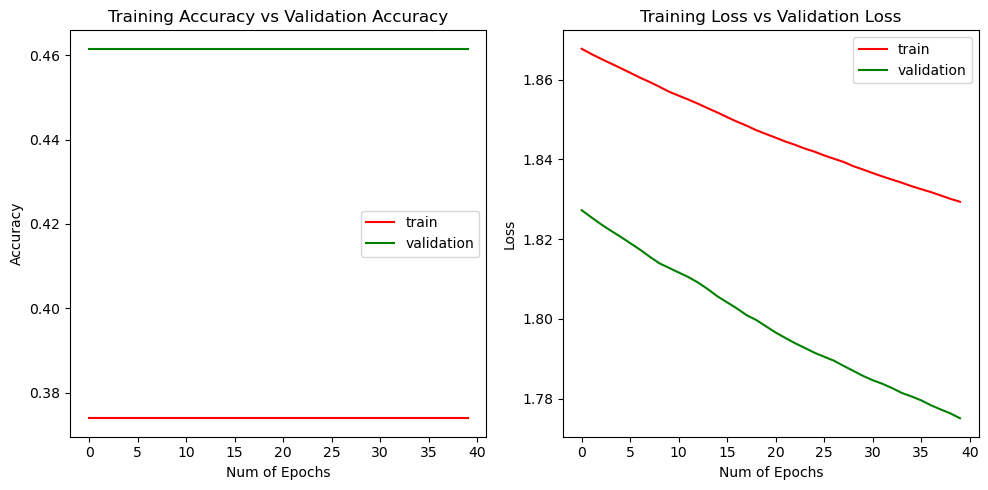

In [454]:
_, ax = plt.subplots(1, 2, figsize=(10, 5), dpi=100)
ax[0].plot(history.history['acc'], 'r')
ax[0].plot(history.history['val_acc'], 'g')
ax[0].set_xlabel("Num of Epochs")
ax[0].set_ylabel("Accuracy")
ax[0].set_title("Training Accuracy vs Validation Accuracy")
ax[0].legend(['train', 'validation'])

ax[1].plot(history.history['loss'], 'r')
ax[1].plot(history.history['val_loss'], 'g')
ax[1].set_xlabel("Num of Epochs")
ax[1].set_ylabel("Loss")
ax[1].set_title("Training Loss vs Validation Loss")
ax[1].legend(['train', 'validation'])

plt.tight_layout()

In [455]:
y_hat = model.predict(x=dfinput_x)
y_hat

array([[0.00084648, 0.00065231, 0.02227719, ..., 0.07736369, 0.00079084,
        0.09823576],
       [0.00084648, 0.00065231, 0.02227719, ..., 0.07736369, 0.00079084,
        0.09823576],
       [0.00084648, 0.00065231, 0.02227719, ..., 0.07736369, 0.00079084,
        0.09823576],
       ...,
       [0.00084648, 0.00065231, 0.02227719, ..., 0.07736369, 0.00079084,
        0.09823576],
       [0.00084648, 0.00065231, 0.02227719, ..., 0.07736369, 0.00079084,
        0.09823576],
       [0.00084648, 0.00065231, 0.02227719, ..., 0.07736369, 0.00079084,
        0.09823576]], dtype=float32)

In [456]:
y_pred_label = np.argmax(y_hat, axis = 1)
y_true_label = np.argmax(dfinput_y, axis = 1)

In [457]:
y_pred_label

array([9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9])

In [458]:
y_true_label

array([ 2, 17,  9,  7, 17, 17,  9,  9,  4,  4,  9,  9, 24,  4,  9,  9, 24,
       24,  9,  9,  4, 24,  9,  9,  4,  4,  7,  9, 24, 24,  9,  9, 22, 22,
        7,  7, 22, 22,  7,  7,  4, 19,  9,  9,  4, 19,  9,  9,  4,  4,  9,
        9,  4,  4,  9,  9,  4,  4,  9,  9, 24, 24,  9,  9, 22, 22,  7,  7,
       22, 22,  7,  7, 24, 24,  9,  9,  4, 19,  9,  9, 19,  4,  9,  9, 19,
       19,  9,  9,  4,  4,  9,  9, 19, 19,  9,  9, 22, 22,  7,  7, 17,  2,
        7,  7, 19, 19,  9,  9, 24,  4,  9,  9, 19, 19,  9,  9, 24, 24,  9,
        9,  4,  4,  9,  9, 19, 19,  9,  4, 22,  2,  7,  7, 22, 22,  7,  7,
       24, 24,  9,  9,  4,  4,  9,  9, 19, 19,  9,  9,  4,  4,  9,  9,  4,
        4,  9,  9, 19, 19,  9,  9,  4, 17,  7,  7, 17,  4,  7,  7, 24,  4,
        9,  9,  4,  4,  9,  9,  4, 19,  9,  9,  4, 24,  9,  9,  4,  4,  9,
        9, 19, 19,  9,  9, 22, 22,  7,  7, 19,  4, 14,  4,  4, 19,  9,  9,
        4,  4,  9,  9,  4,  4,  9,  9, 24,  4,  9,  9,  4,  4,  9,  9, 19,
       19,  9,  9, 22,  2

In [462]:
y_pred_label

array([9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9])

In [465]:
tabla = pd.crosstab(y_pred_label, y_true_label)
tabla

col_0,2,4,7,9,14,17,19,22,24
row_0,,,,,,,,,
9,4,52,26,98,2,6,32,16,20


In [464]:
pd.crosstab(y_pred_label, y_true_label).shape

(1, 9)

In [471]:
gana = tabla.max(axis = 1)
gana

row_0
9    98
dtype: int64

# DEEP LEARNING - RED NEURONAL

In [548]:
#(solo las categorías sin split: 0-14)
data_real = pd.DataFrame()
data_real = pd.concat([data_real, filtered_df_blosclz_nofilter_split, 
                      filtered_df_lz4_nofilter_split, 
                      filtered_df_lz4hc_nofilter_split, 
                      filtered_df_zlib_nofilter_split, 
                      filtered_df_zstd_nofilter_split, 
                      
                      filtered_df_blosclz_shuffle_split, 
                      filtered_df_lz4_shuffle_split, 
                      filtered_df_lz4hc_shuffle_split, 
                      filtered_df_zlib_shuffle_split, 
                      filtered_df_zstd_shuffle_split, 
                      
                      filtered_df_blosclz_bitshuffle_split, 
                      filtered_df_lz4_bitshuffle_split, 
                      filtered_df_lz4hc_bitshuffle_split, 
                      filtered_df_zlib_bitshuffle_split, 
                      filtered_df_zstd_bitshuffle_split], axis = 0)

labels_real = pd.Series(data_real['category'])

data_real = data_real.drop(['special_vals', 'nchunk', 'codec_filter'], axis = 1)

In [549]:
data_entropy = pd.DataFrame()
data_entropy = pd.concat([data_entropy, filtered_df_entropy_nofitler, 
                         filtered_df_entropy_shuffle, 
                          filtered_df_entropy_bitshuffle], axis = 0)

Quiero la mayor cratio/mean(cratio) + speed/mean(speed) para cada bloque (split en este caso).


In [550]:
mean_speed = data_real['speed'].mean()
mean_cratio = data_real['cratio'].mean()

In [555]:
#Me quedo con las columnas cratio y speed
df0 = pd.DataFrame()
df0 = pd.concat([df0, filtered_df_blosclz_nofilter_split], axis = 0)

df0 = df0.drop(['special_vals', 'nchunk', 'category', 'codec_filter'], axis = 1)

#Añado la columna que contiene la suma de cratio y speed
#df1.insert(2, "0", df1.sum(axis=1))
df0.insert(2, "0", df0['cratio']/mean_cratio + df0['speed']/mean_speed)

#Me quedo solo con la columna suma
df0 = df0.drop(['cratio', 'speed'], axis = 1)

#Este dataframe contiene la función que queremos maximizar para cada bloque 
#(en este caso para la combinación blosclz - nofilter - split)

In [556]:
df1 = pd.DataFrame()
df1 = pd.concat([df1, filtered_df_lz4_nofilter_split], axis = 0)
df1 = df1.drop(['special_vals', 'nchunk', 'category', 'codec_filter'], axis = 1)

df1.insert(2, "1", df1['cratio']/mean_cratio + df1['speed']/mean_speed)
df1 = df1.drop(['cratio', 'speed'], axis = 1)

In [557]:
df2 = pd.DataFrame()
df2 = pd.concat([df2, filtered_df_lz4hc_nofilter_split], axis = 0)
df2 = df2.drop(['special_vals', 'nchunk', 'category', 'codec_filter'], axis = 1)

df2.insert(2, "2", df2['cratio']/mean_cratio + df2['speed']/mean_speed)
df2 = df2.drop(['cratio', 'speed'], axis = 1)

In [558]:
df3 = pd.DataFrame()
df3 = pd.concat([df3, filtered_df_zlib_nofilter_split], axis = 0)
df3 = df3.drop(['special_vals', 'nchunk', 'category', 'codec_filter'], axis = 1)

df3.insert(2, "3", df3['cratio']/mean_cratio + df3['speed']/mean_speed)
df3 = df3.drop(['cratio', 'speed'], axis = 1)

In [559]:
df4 = pd.DataFrame()
df4 = pd.concat([df4, filtered_df_zstd_nofilter_split], axis = 0)
df4 = df4.drop(['special_vals', 'nchunk', 'category', 'codec_filter'], axis = 1)

df4.insert(2, "4", df4['cratio']/mean_cratio + df4['speed']/mean_speed)
df4 = df4.drop(['cratio', 'speed'], axis = 1)

In [560]:
df5 = pd.DataFrame()
df5 = pd.concat([df5, filtered_df_blosclz_shuffle_split], axis = 0)
df5 = df5.drop(['special_vals', 'nchunk', 'category', 'codec_filter'], axis = 1)

df5.insert(2, "5", df5['cratio']/mean_cratio + df5['speed']/mean_speed)
df5 = df5.drop(['cratio', 'speed'], axis = 1)

In [561]:
df6 = pd.DataFrame()
df6 = pd.concat([df6, filtered_df_lz4_shuffle_split], axis = 0)
df6 = df6.drop(['special_vals', 'nchunk', 'category', 'codec_filter'], axis = 1)

df6.insert(2, "6", df6['cratio']/mean_cratio + df6['speed']/mean_speed)
df6 = df6.drop(['cratio', 'speed'], axis = 1)

In [562]:
df7 = pd.DataFrame()
df7 = pd.concat([df7, filtered_df_lz4hc_shuffle_split], axis = 0)
df7 = df7.drop(['special_vals', 'nchunk', 'category', 'codec_filter'], axis = 1)

df7.insert(2, "7", df7['cratio']/mean_cratio + df7['speed']/mean_speed)
df7 = df7.drop(['cratio', 'speed'], axis = 1)

In [563]:
df8 = pd.DataFrame()
df8 = pd.concat([df8, filtered_df_zlib_shuffle_split], axis = 0)
df8 = df8.drop(['special_vals', 'nchunk', 'category', 'codec_filter'], axis = 1)

df8.insert(2, "8", df8['cratio']/mean_cratio + df8['speed']/mean_speed)
df8 = df8.drop(['cratio', 'speed'], axis = 1)

In [564]:
df9 = pd.DataFrame()
df9 = pd.concat([df9, filtered_df_zstd_shuffle_split], axis = 0)
df9 = df9.drop(['special_vals', 'nchunk', 'category', 'codec_filter'], axis = 1)

df9.insert(2, "9", df9['cratio']/mean_cratio + df9['speed']/mean_speed)
df9 = df9.drop(['cratio', 'speed'], axis = 1)

In [565]:
df10 = pd.DataFrame()
df10 = pd.concat([df10, filtered_df_blosclz_bitshuffle_split], axis = 0)
df10 = df10.drop(['special_vals', 'nchunk', 'category', 'codec_filter'], axis = 1)

df10.insert(2, "10", df10['cratio']/mean_cratio + df10['speed']/mean_speed)
df10 = df10.drop(['cratio', 'speed'], axis = 1)

In [566]:
df11 = pd.DataFrame()
df11 = pd.concat([df11, filtered_df_lz4_bitshuffle_split], axis = 0)
df11 = df11.drop(['special_vals', 'nchunk', 'category', 'codec_filter'], axis = 1)

df11.insert(2, "11", df11['cratio']/mean_cratio + df11['speed']/mean_speed)
df11 = df11.drop(['cratio', 'speed'], axis = 1)

In [567]:
df12 = pd.DataFrame()
df12 = pd.concat([df12, filtered_df_lz4_bitshuffle_split], axis = 0)
df12 = df12.drop(['special_vals', 'nchunk', 'category', 'codec_filter'], axis = 1)

df12.insert(2, "12", df12['cratio']/mean_cratio + df12['speed']/mean_speed)
df12 = df12.drop(['cratio', 'speed'], axis = 1)

In [568]:
df13 = pd.DataFrame()
df13 = pd.concat([df13, filtered_df_zlib_bitshuffle_split], axis = 0)
df13 = df13.drop(['special_vals', 'nchunk', 'category', 'codec_filter'], axis = 1)

df13.insert(2, "13", df13['cratio']/mean_cratio + df13['speed']/mean_speed)
df13 = df13.drop(['cratio', 'speed'], axis = 1)

In [569]:
df14 = pd.DataFrame()
df14 = pd.concat([df14, filtered_df_zstd_bitshuffle_split], axis = 0)
df14 = df14.drop(['special_vals', 'nchunk', 'category', 'codec_filter'], axis = 1)

df14.insert(2, "14", df14['cratio']/mean_cratio + df14['speed']/mean_speed)
df14 = df14.drop(['cratio', 'speed'], axis = 1)

In [899]:
df = pd.DataFrame()
df = pd.concat([df0, df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14], axis=1)

In [900]:
pos_min = df.idxmin(axis=1)
pos_min = pd.DataFrame(pos_min, columns=['pos_min'])

df_ = pd.concat([df, pos_min], axis=1)

,pos_min
0,2
1,2
2,9
3,7
4,2
...,...
251,9
252,2
253,4
254,9


In [572]:
#df_cratio_speed = data_entropy[['cratio', 'speed']]
#df_cratio_speed

In [573]:
df_nofilter = pd.DataFrame()
df_nofilter = pd.concat([df0, df1, df2, df3, df4], axis=1)
df_shuffle = pd.DataFrame()
df_shuffle = pd.concat([df5, df6, df7, df8, df9], axis=1)
df_bitshuffle = pd.DataFrame()
df_bitshuffle = pd.concat([df10, df11, df12, df13, df14], axis=1)

INPUT: entropy cratio - entropy speed - millor combinació (entre las 15 categ.)

Classificar per filtre del entropy

In [576]:
df_input_nofilter = pd.concat([filtered_df_entropy_nofitler[['cratio', 'speed']], pos_min], axis=1)
df_input_shuffle = pd.concat([filtered_df_entropy_shuffle[['cratio', 'speed']], pos_min], axis=1)
df_input_bitshuffle = pd.concat([filtered_df_entropy_bitshuffle[['cratio', 'speed']], pos_min], axis=1)

INPUT QUE USO EN NN

In [754]:
dfinput = df_input_shuffle

dfinput_x = dfinput[['cratio', 'speed']]
dfinput_y = dfinput[['pos_min']]

from keras.utils import to_categorical
dfinput_y = to_categorical(dfinput_y)

Construir el modelo

In [698]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(2, activation='relu', input_shape=(1,2)))
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dense(18, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(15, activation='softmax'))

Compilar el modelo

In [699]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [702]:
history = model.fit(dfinput_x, dfinput_y, epochs=40, validation_split=0.1)

Epoch 1/40
8/8 [==============================] - 0s 7ms/step - loss: 2.4774 - acc: 0.1478 - val_loss: 2.4796 - val_acc: 0.0385
Epoch 2/40
8/8 [==============================] - 0s 4ms/step - loss: 2.4679 - acc: 0.1478 - val_loss: 2.4700 - val_acc: 0.0385
Epoch 3/40
8/8 [==============================] - 0s 3ms/step - loss: 2.4586 - acc: 0.1478 - val_loss: 2.4605 - val_acc: 0.0385
Epoch 4/40
8/8 [==============================] - 0s 3ms/step - loss: 2.4495 - acc: 0.1478 - val_loss: 2.4511 - val_acc: 0.0385
Epoch 5/40
8/8 [==============================] - 0s 3ms/step - loss: 2.4404 - acc: 0.1478 - val_loss: 2.4419 - val_acc: 0.0385
Epoch 6/40
8/8 [==============================] - 0s 3ms/step - loss: 2.4315 - acc: 0.1478 - val_loss: 2.4328 - val_acc: 0.0385
Epoch 7/40
8/8 [==============================] - 0s 3ms/step - loss: 2.4227 - acc: 0.1478 - val_loss: 2.4238 - val_acc: 0.0385
Epoch 8/40
8/8 [==============================] - 0s 3ms/step - loss: 2.4139 - acc: 0.1478 - val_loss: 2

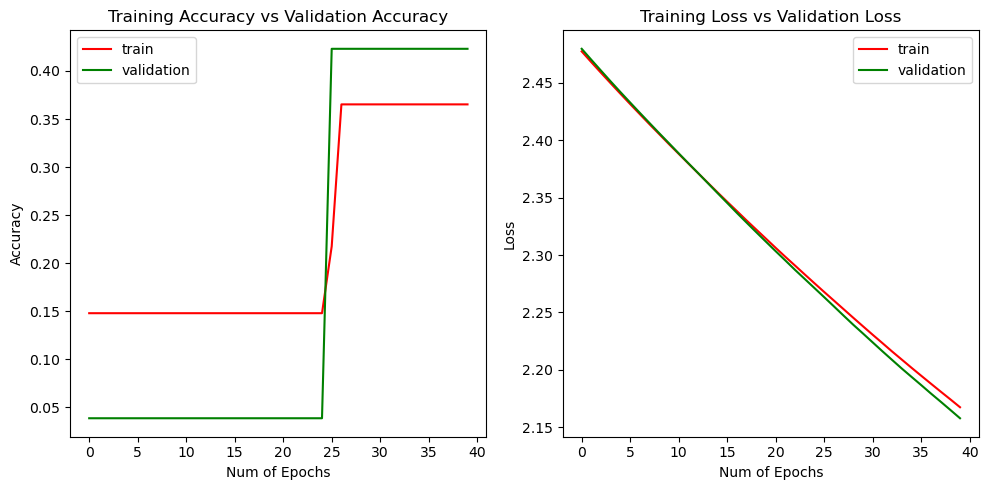

In [703]:
_, ax = plt.subplots(1, 2, figsize=(10, 5), dpi=100)
ax[0].plot(history.history['acc'], 'r')
ax[0].plot(history.history['val_acc'], 'g')
ax[0].set_xlabel("Num of Epochs")
ax[0].set_ylabel("Accuracy")
ax[0].set_title("Training Accuracy vs Validation Accuracy")
ax[0].legend(['train', 'validation'])

ax[1].plot(history.history['loss'], 'r')
ax[1].plot(history.history['val_loss'], 'g')
ax[1].set_xlabel("Num of Epochs")
ax[1].set_ylabel("Loss")
ax[1].set_title("Training Loss vs Validation Loss")
ax[1].legend(['train', 'validation'])

plt.tight_layout()

In [758]:
y_hat = model.predict(x=dfinput_x)
y_hat

In [759]:
y_hat

array([[0.        , 0.01034163, 0.03205326, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.01034163, 0.03205326, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.01034163, 0.03205326, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.01034163, 0.03205326, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.01034163, 0.03205326, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.01034163, 0.03205326, ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [815]:
y_pred_label = np.argmax(y_hat, axis = 1)
y_true_label = np.argmax(dfinput_y, axis = 1)
y_pred_label

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [774]:
dfinput_y.shape

(256, 1)

In [812]:
dfinput_y_arr = dfinput_y.to_numpy()

In [813]:
dfinput_y_arr = dfinput_y_arr.astype(int)

type(dfinput_y_arr)
dfinput_y_arr.shape

(256, 1)

In [799]:
y_pred_label = np.transpose(y_pred_label)
y_pred_label.shape
#type(y_pred_label)

In [800]:
pd.crosstab(y_pred_label, dfinput_y)

ValueError: Data must be 1-dimensional

<AxesSubplot:>

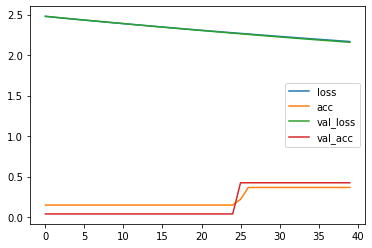

In [727]:
history_df = pd.DataFrame(history.history)
history_df.plot()

Divido datos en 75% para entrenamiento y 25% para test

In [101]:
df_train = dfinput.sample(frac = 0.75) 
  
df_test = dfinput.drop(df_train.index)

In [102]:
df_trainx = df_train[['cratio', 'speed']]
df_trainy = df_train[['pos_min']]

df_testx = df_test[['cratio', 'speed']]
df_testy = df_test[['pos_min']]

In [103]:
df_trainx.shape

(192, 2)

In [104]:
from keras.utils import to_categorical
df_trainy = to_categorical(df_trainy)
df_testy = to_categorical(df_testy)

In [105]:
df_trainy.shape

(192, 25)

In [106]:
df_testy.shape

(64, 25)

In [107]:
from keras import models, layers

model2 = models.Sequential()
model2.add(layers.Dense(2, activation='relu', input_shape=(1,2)))
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dense(18, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model2.add(layers.Dense(25, activation='softmax'))

In [108]:
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',  #poner función especial
              metrics=['acc'])

In [111]:
history2 = model2.fit(df_trainx, df_trainy, validation_data=(df_testx, df_testy), epochs=50)

Epoch 1/50
6/6 [==============================] - 0s 8ms/step - loss: 46690956.0000 - acc: 0.2917 - val_loss: 75199736.0000 - val_acc: 0.2656
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 45376532.0000 - acc: 0.1198 - val_loss: 75006328.0000 - val_acc: 0.2344
Epoch 3/50
6/6 [==============================] - 0s 4ms/step - loss: 45072972.0000 - acc: 0.2708 - val_loss: 75417800.0000 - val_acc: 0.2656
Epoch 4/50
6/6 [==============================] - 0s 4ms/step - loss: 44353244.0000 - acc: 0.2083 - val_loss: 74978200.0000 - val_acc: 0.2656
Epoch 5/50
6/6 [==============================] - 0s 4ms/step - loss: 44019924.0000 - acc: 0.2656 - val_loss: 75347784.0000 - val_acc: 0.2656
Epoch 6/50
6/6 [==============================] - 0s 4ms/step - loss: 43919348.0000 - acc: 0.2708 - val_loss: 72663280.0000 - val_acc: 0.1562
Epoch 7/50
6/6 [==============================] - 0s 4ms/step - loss: 42942288.0000 - acc: 0.0781 - val_loss: 72011312.0000 - val_acc: 0.2344
Epoch 

<AxesSubplot:>

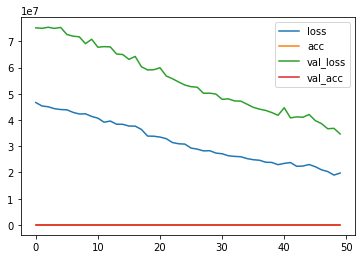

In [112]:
history_df = pd.DataFrame(history2.history)
history_df.plot()

Minimum Validation Loss: 14790549.0000


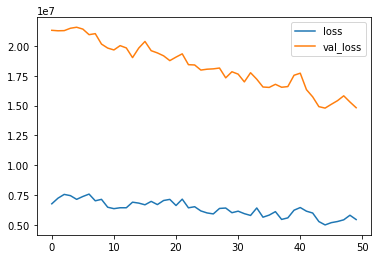

In [723]:
history_df = pd.DataFrame(history2.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

ShuffleSplit

In [472]:
from sklearn.model_selection import ShuffleSplit

In [473]:
ss = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)

In [476]:
data_train = pd.DataFrame()
data_test = pd.DataFrame()

for train_index, test_index in ss.split(dfinput):
    #m = train_index.shape
    #n = type(train_index)
    data_train = pd.concat([data_train, train_index], axis=1)
    data_test = pd.concat([data_test, test_index], axis=1)

TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid

In [749]:
m

(204,)

In [750]:
n

numpy.ndarray

In [478]:
import numpy as np
from sklearn.model_selection import ShuffleSplit

In [491]:
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [3, 4], [5, 6]])
y = np.array([1, 2, 1, 2, 1, 2])
X.shape
type(X)

numpy.ndarray

In [493]:
X

array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8],
       [3, 4],
       [5, 6]])

In [494]:
y

array([1, 2, 1, 2, 1, 2])

In [486]:
cv = ShuffleSplit(n_splits=5, train_size=0.5, test_size=.25, random_state=0)

for train_index, test_index in cv.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [1 3 0] TEST: [5 2]
TRAIN: [4 0 2] TEST: [1 3]
TRAIN: [1 2 4] TEST: [3 5]
TRAIN: [3 4 1] TEST: [5 2]
TRAIN: [3 5 1] TEST: [2 4]


In [488]:
df_trainx = df_trainx.to_numpy()

In [489]:
df_trainx.shape

(192, 2)

In [490]:
type(df_trainx)

numpy.ndarray

In [492]:
cv = ShuffleSplit(n_splits=5, train_size=0.5, test_size=.25, random_state=0)

for train_index, test_index in cv.split(df_trainx):
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [112  61 177 123  19 146  83  54 156  16  51  86 143  40 176  22 131 130
 137  80 108  14  27  92 109  46 188  98  62   2  59 106 107  43  10  93
  73 185 171 124 189 134 154 184  50   0  94 153  95  64 135  41  69  49
  48  85  13 144  23 179 129  20  15  78 104  52 100  76   3 116 190 125
   6  68  75  84 141 121  12 168 164 149  91 173  11 119 102  35  57  65
   1 120 155  42 105 132] TEST: [110  74 163  97 126  71  18 157 145   7   5 139 158 170 160 167  37  66
 138 122  56 187 136 182 191 152  63  60 161  33   4  55  96  44  45  26
 178 180 113   8 101  89  90 118 175 111  24  30]
TRAIN: [ 15 170 109   5  90  77   7  74 140  62   4 100  20 146 105  14  42 106
 130  82  64  55  86  13 176  72  19 181  56   8 169 163 117 186 159  16
  63 142  58  81  28 110  89 162  21 158 189 161  49  83 182  92 134  71
  70 119 127  22  75 157 164 150 144  66 168  12 101  69 173  84 191  17
  18 145 113 167  30 114 135 124 103 166  25 143 116  91 120 177 112 190
 136  80 126 147   0  36] TE